# Imputacion por KNN

## Preparacion del entorno

### Librerias

In [21]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica

# sklearn contiene los modelos a utilizar
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor

### Configuracion de Graficas

In [22]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

### Cargar funciones personalizadas

In [23]:
%run '../utils2.ipynb'

## Cargar Datos Preparados

In [24]:
%run tratamiento_v_categoricas.ipynb

12.25 %


## Imputacion por Vecinos Mas Cercanos

In [25]:
nhanes_transformed_df

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,1.0,43.04,300.0,0.0,0.0,0.0,1.0,165.0,0.0,66.0
93706.0,NaN,NaN,240.0,0.0,0.0,0.0,1.0,145.0,0.0,18.0
93709.0,0.0,NaN,600.0,0.0,1.0,0.0,0.0,200.0,0.0,75.0
93711.0,NaN,163.76,420.0,0.0,0.0,1.0,1.0,142.0,0.0,56.0
93712.0,2.0,207.67,120.0,1.0,1.0,1.0,1.0,135.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,1.0,NaN,120.0,0.0,0.0,1.0,0.0,118.0,0.0,31.0
102949.0,0.0,NaN,60.0,1.0,1.0,0.0,0.0,180.0,0.0,33.0
102953.0,1.0,NaN,360.0,1.0,1.0,0.0,0.0,218.0,0.0,42.0


In [26]:
# creamos el imputador con knn

knn_imputer = sklearn.impute.KNNImputer()

In [27]:
# copia del dataframe

nhanes_df_knn = nhanes_transformed_df.copy(deep=True)

In [28]:
# imputacion de los valores faltantes

nhanes_df_knn.iloc[:, :] = knn_imputer.fit_transform(nhanes_transformed_df).round()

nhanes_df_knn

,cigarettes,sugar_gm,minutes_sedentary,vigorous_work,moderate_work,vigorous_recreational,moderate_recreational,weight,diabetes,age
SEQN,,,,,,,,,,
93705.0,1.0,43.0,300.0,0.0,0.0,0.0,1.0,165.0,0.0,66.0
93706.0,1.0,82.0,240.0,0.0,0.0,0.0,1.0,145.0,0.0,18.0
93709.0,0.0,140.0,600.0,0.0,1.0,0.0,0.0,200.0,0.0,75.0
93711.0,0.0,164.0,420.0,0.0,0.0,1.0,1.0,142.0,0.0,56.0
93712.0,2.0,208.0,120.0,1.0,1.0,1.0,1.0,135.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,1.0,60.0,120.0,0.0,0.0,1.0,0.0,118.0,0.0,31.0
102949.0,0.0,161.0,60.0,1.0,1.0,0.0,0.0,180.0,0.0,33.0
102953.0,1.0,144.0,360.0,1.0,1.0,0.0,0.0,218.0,0.0,42.0


### Visualizacion de valores imputados

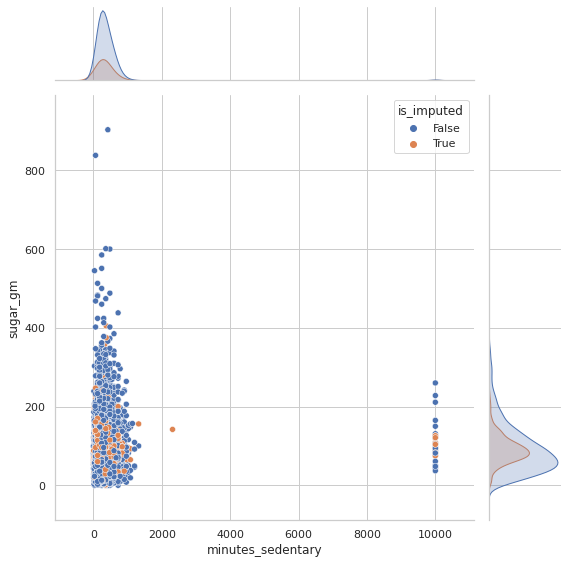

In [29]:
# Grafica minutes_sedentary vs sugar_gm

(
    pd.concat(
        [
            nhanes_df_knn,
            nhanes_df.missing.create_shadow_matrix2(True, False, suffix='_imp', only_missing=True)
        ],
        axis=1
    )
    .missing.scatter_imputation_plot(
        x='minutes_sedentary',
        y='sugar_gm',
        show_marginal = True,   # muestra la distribucion a los costado
        height = 8             # tamano del grafico
    )
)

In [30]:
print('''La grafica nos muestra una excelente variabilidad para los datos imputados conservando
la estructura de los datos originales. Notamos que las distribuciones son similares lo que indica
una buena imputacion''')

La grafica nos muestra una excelente variabilidad para los datos imputados conservando
la estructura de los datos originales. Notamos que las distribuciones son similares lo que indica
una buena imputacion


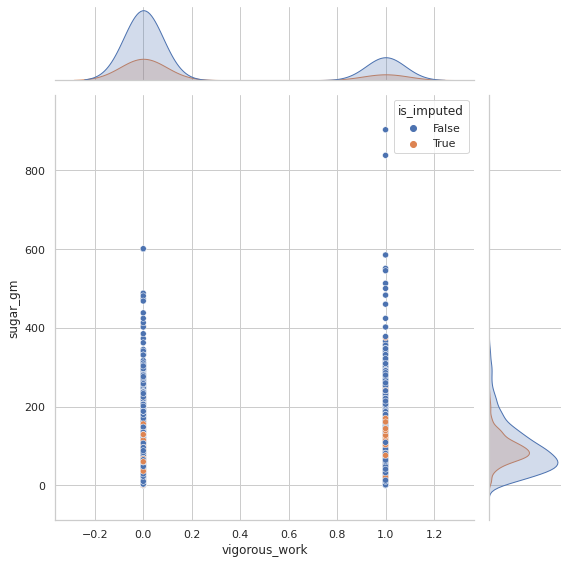

In [31]:
# Grafica vigorous_work vs sugar_gm

(
    pd.concat(
        [
            nhanes_df_knn,
            nhanes_df.missing.create_shadow_matrix2(True, False, suffix='_imp', only_missing=True)
        ],
        axis=1
    )
    .missing.scatter_imputation_plot(
        x='vigorous_work',
        y='sugar_gm',
        show_marginal = True,   # muestra la distribucion a los costado
        height = 8             # tamano del grafico
    )
)

In [32]:
print('''Aca tambien vemos una imputacion bastante buena en cuanto a los datos. 
Las distribuciones son similares''')

Aca tambien vemos una imputacion bastante buena en cuanto a los datos. 
Las distribuciones son similares


### Imputacion ordenamiento por cantidad de variables con valores faltantes

In [33]:
# imputador por knn

knn_imputer = sklearn.impute.KNNImputer()

In [34]:
# copia del dataframe

nhanes_df_knn = nhanes_transformed_df.missing.sort_variables_by_missingness(ascending=True).copy(deep=True)

In [35]:
# agreagamos los valores imputados al nuevo dataframe

nhanes_df_knn.iloc[:, :] = knn_imputer.fit_transform(
    nhanes_transformed_df
    .missing
    .sort_variables_by_missingness(ascending=True)
    .copy(deep=True)
    ).round()

nhanes_df_knn


,weight,diabetes,age,vigorous_recreational,moderate_recreational,moderate_work,vigorous_work,minutes_sedentary,sugar_gm,cigarettes
SEQN,,,,,,,,,,
93705.0,165.0,0.0,66.0,0.0,1.0,0.0,0.0,300.0,43.0,1.0
93706.0,145.0,0.0,18.0,0.0,1.0,0.0,0.0,240.0,82.0,1.0
93709.0,200.0,0.0,75.0,0.0,0.0,1.0,0.0,600.0,140.0,0.0
93711.0,142.0,0.0,56.0,1.0,1.0,0.0,0.0,420.0,164.0,0.0
93712.0,135.0,0.0,18.0,1.0,1.0,1.0,1.0,120.0,208.0,2.0
...,...,...,...,...,...,...,...,...,...,...
102948.0,118.0,0.0,31.0,1.0,0.0,0.0,0.0,120.0,60.0,1.0
102949.0,180.0,0.0,33.0,0.0,0.0,1.0,1.0,60.0,161.0,0.0
102953.0,218.0,0.0,42.0,0.0,0.0,1.0,1.0,360.0,144.0,1.0


### Visualizacion de valores imputados

Imputacion Ordenamiento por cantidad de variables con valores faltantes


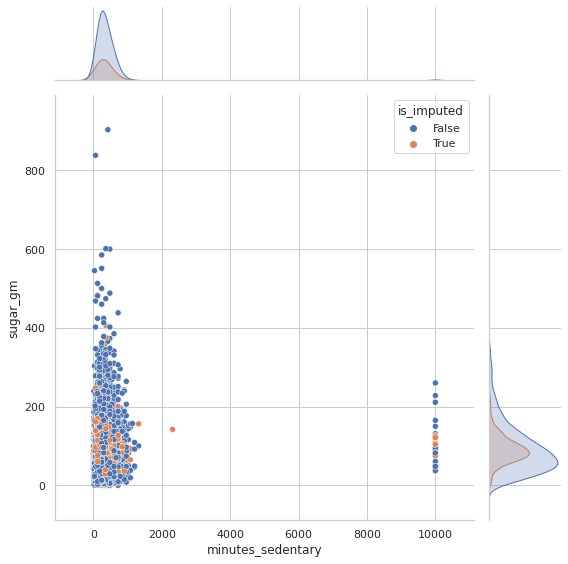

In [36]:
print('Imputacion Ordenamiento por cantidad de variables con valores faltantes')

(   # matriz de sombra
    pd.concat(
        [
            nhanes_df_knn,
            nhanes_df.missing.create_shadow_matrix2(True, False, suffix='_imp', only_missing=True)
        ],
        axis=1
    )   # visualizacion mediantes un scatterplot de dos variables numericas
    .missing.scatter_imputation_plot(
        x = 'minutes_sedentary',
        y = 'sugar_gm',
        show_marginal = True,   # muestra la distribucion a los costado
        height = 8             # tamano del grafico
    )
);